# Quantum Process Tomography

In this notebook we will work through different tomography schemes, building up in complexity. With the ultimate goal to work towards Quantum Process Tomography.

*Contributors*: Boran Apak, Yorgos Sotiropoulos  and Joost van der Zalm (for the Quantum Information Project [AP3421]) 

## 1.a) Qubit State Tomography

First we will look at measuring a **single pure state**.

In [1]:
import numpy as np
import qiskit as qk
import math
from quantuminspire.qiskit import QI
from quantuminspire.credentials import save_account
save_account('7ff8243ba6d4643e4ec1774b7079f8086df7e872')
QI.set_authentication()
qi_backend = QI.get_backend('QX single-node simulator') # Possible options: 'QX single-node simulator', 'Spin-2', 'Starmon-5'

Experiment for measuring the expectation value in the X direction
      ┌───┐┌───┐┌──────────┐┌─┐
q0_0: ┤ H ├┤ T ├┤ RY(-π/2) ├┤M├
      └───┘└───┘└──────────┘└╥┘
c0: 1/═══════════════════════╩═
                             0 

State	Counts
0	217
1	39
The expected X value = 0.6953125
Experiment for measuring the expectation value in the Y direction
      ┌───┐┌───┐┌─────────┐┌─┐
q5_0: ┤ H ├┤ T ├┤ RX(π/2) ├┤M├
      └───┘└───┘└─────────┘└╥┘
c1: 1/══════════════════════╩═
                            0 

State	Counts
0	226
1	30
The expected Y value = 0.765625
Experiment for measuring the expectation value in the Z direction
       ┌───┐┌───┐┌─┐
q10_0: ┤ H ├┤ T ├┤M├
       └───┘└───┘└╥┘
 c2: 1/═══════════╩═
                  0 

State	Counts
0	131
1	125
The expected Z value = 0.0234375


After the experiments we find the following bloch vector [0.6953125, 0.765625, 0.0234375]


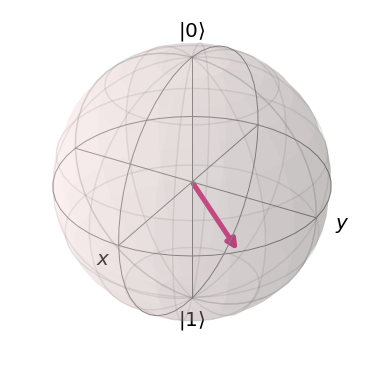

In [2]:
qubit_state_vector = [0, 0, 0]
i=0
for direction in ['X','Y','Z']:
    print('Experiment for measuring the expectation value in the', direction, 'direction')
    
    ## Setting up experiment
    q = qk.QuantumRegister(1)         # Create a Quantum register of 1 qubit
    c = qk.ClassicalRegister(1)       # Create a Classical register of 1 bit

    circuit = qk.QuantumCircuit(q,c)  # Create a Quantum Circuit acting on a quantum register of 1 qubit
    circuit.h(0)                      # Add a H gate on qubit 0, putting this qubit in superposition.
    circuit.t(0)                      # Add a T gate on qubit 0, rotating it by pi/4 around the z-axis
    if direction == 'X' : circuit.ry(-math.pi/2, 0)
    if direction == 'Y' : circuit.rx(math.pi/2, 0)
    circuit.measure(q,c)              # Do a measurement in the standard basis
    print(circuit)                    # Circuit can simply be printed in this way

    ## Measuring the the expected value
    number_of_shots = 256
    qi_job = qk.execute(circuit, backend=qi_backend, shots=number_of_shots)
    qi_result = qi_job.result()
    histogram = qi_result.get_counts(circuit)
    print('\nState\tCounts')
    expected_value = 0
    for state, counts in histogram.items():
        print('{0}\t{1}'.format(state, counts))
        expected_value += (-1)**int(state) * int(counts)
    expected_value = expected_value / number_of_shots
    qubit_state_vector[i] = expected_value
    i += 1
    print('The expected', direction, 'value =', str(expected_value))
    
print('\n\nAfter the experiments we find the following bloch vector', str(qubit_state_vector))
qk.visualization.plot_bloch_vector(qubit_state_vector)

## 1.b) Qubit State Tomography
Second let's look at measuring a **Maximally mixed state**.

Experiment for measuring the expectation value in the X direction
       ┌───┐     ┌──────────┐┌─┐
q45_0: ┤ H ├──■──┤ RY(-π/2) ├┤M├
       └───┘┌─┴─┐└──────────┘└╥┘
q45_1: ─────┤ X ├─────────────╫─
            └───┘             ║ 
c12: 1/═══════════════════════╩═
                              0 

State	Counts
0	115
1	141
The expected X value = -0.1015625
Experiment for measuring the expectation value in the Y direction
       ┌───┐     ┌─────────┐┌─┐
q50_0: ┤ H ├──■──┤ RX(π/2) ├┤M├
       └───┘┌─┴─┐└─────────┘└╥┘
q50_1: ─────┤ X ├────────────╫─
            └───┘            ║ 
c13: 1/══════════════════════╩═
                             0 

State	Counts
0	130
1	126
The expected Y value = 0.015625
Experiment for measuring the expectation value in the Z direction
       ┌───┐     ┌─┐
q55_0: ┤ H ├──■──┤M├
       └───┘┌─┴─┐└╥┘
q55_1: ─────┤ X ├─╫─
            └───┘ ║ 
c14: 1/═══════════╩═
                  0 

State	Counts
0	132
1	124
The expected Z value = 0.03125


After the experiments w

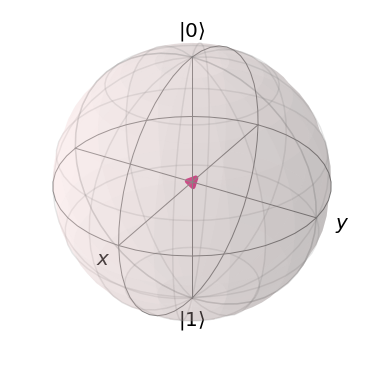

In [8]:
qubit_state_vector = [0, 0, 0]
i=0
for direction in ['X','Y','Z']:
    print('Experiment for measuring the expectation value in the', direction, 'direction')
    
    ## Setting up experiment
    q = qk.QuantumRegister(2)         # Create a Quantum register of 1 qubit
    c = qk.ClassicalRegister(1)       # Create a Classical register of 1 bit

    circuit = qk.QuantumCircuit(q,c)  # Create a Quantum Circuit acting on a quantum register of 1 qubit
    circuit.h(0)                      # Add a H gate on qubit 0, putting this qubit in superposition.
    circuit.cx(q[0], q[1])            # Add a control-X gate with qubit 0 the control, and qubit 1 the target
    if direction == 'X' : circuit.ry(-math.pi/2, 0)
    if direction == 'Y' : circuit.rx(math.pi/2, 0)
    circuit.measure(q[0],c)           # Do a measurement in the standard basis
    print(circuit)                    # Circuit can simply be printed in this way

    ## Measuring the the expected value
    number_of_shots = 256
    qi_job = qk.execute(circuit, backend=qi_backend, shots=number_of_shots)
    qi_result = qi_job.result()
    histogram = qi_result.get_counts(circuit)
    print('\nState\tCounts')
    expected_value = 0
    for state, counts in histogram.items():
        print('{0}\t{1}'.format(state, counts))
        expected_value += (-1)**int(state) * int(counts)
    expected_value = expected_value / number_of_shots
    qubit_state_vector[i] = expected_value
    i += 1
    print('The expected', direction, 'value =', str(expected_value))

print('\n\nAfter the experiments we find the following bloch vector', str(qubit_state_vector))
qk.visualization.plot_bloch_vector(qubit_state_vector)

## 1.c) Qubit State Tomography
Third let's look at measuring an **Intermediate maximally mixed state**.

Experiment for measuring the expectation value in the X direction
       ┌──────────┐     ┌──────────┐┌─┐
q83_0: ┤ RY(-π/4) ├──■──┤ RY(-π/2) ├┤M├
       └──────────┘┌─┴─┐└──────────┘└╥┘
q83_1: ────────────┤ X ├─────────────╫─
                   └───┘             ║ 
c22: 1/══════════════════════════════╩═
                                     0 

State	Counts
0	120
1	136
The expected X value = -0.0625
Experiment for measuring the expectation value in the Y direction
       ┌──────────┐     ┌─────────┐┌─┐
q87_0: ┤ RY(-π/4) ├──■──┤ RX(π/2) ├┤M├
       └──────────┘┌─┴─┐└─────────┘└╥┘
q87_1: ────────────┤ X ├────────────╫─
                   └───┘            ║ 
c23: 1/═════════════════════════════╩═
                                    0 

State	Counts
0	124
1	132
The expected Y value = -0.03125
Experiment for measuring the expectation value in the Z direction
       ┌──────────┐     ┌─┐
q92_0: ┤ RY(-π/4) ├──■──┤M├
       └──────────┘┌─┴─┐└╥┘
q92_1: ────────────┤ X ├─╫─
                   └──

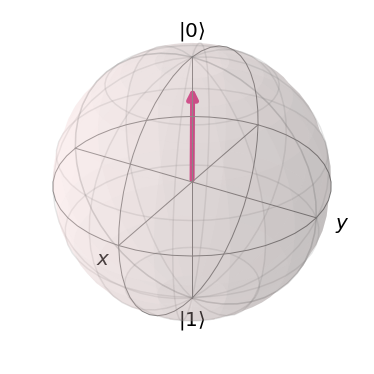

In [12]:
qubit_state_vector = [0, 0, 0]
i=0
for direction in ['X','Y','Z']:
    print('Experiment for measuring the expectation value in the', direction, 'direction')
    
    ## Setting up experiment
    q = qk.QuantumRegister(2)         # Create a Quantum register of 1 qubit
    c = qk.ClassicalRegister(1)       # Create a Classical register of 1 bit

    circuit = qk.QuantumCircuit(q,c)  # Create a Quantum Circuit acting on a quantum register of 1 qubit
    circuit.ry(-math.pi/4, q[0])      # Add a RY gate on qubit 0, putting this qubit in in intermediate state
    circuit.cx(q[0], q[1])            # Add a control-X gate with qubit 0 the control, and qubit 1 the target
    if direction == 'X' : circuit.ry(-math.pi/2, 0)
    if direction == 'Y' : circuit.rx(math.pi/2, 0)
    circuit.measure(q[0],c)           # Do a measurement in the standard basis
    print(circuit)                    # Circuit can simply be printed in this way

    ## Measuring the the expected value
    number_of_shots = 256
    qi_job = qk.execute(circuit, backend=qi_backend, shots=number_of_shots)
    qi_result = qi_job.result()
    histogram = qi_result.get_counts(circuit)
    print('\nState\tCounts')
    expected_value = 0
    for state, counts in histogram.items():
        print('{0}\t{1}'.format(state, counts))
        expected_value += (-1)**int(state) * int(counts)
    expected_value = expected_value / number_of_shots
    qubit_state_vector[i] = expected_value
    i += 1
    print('The expected', direction, 'value =', str(expected_value))

print('\n\nAfter the experiments we find the following bloch vector', str(qubit_state_vector))
qk.visualization.plot_bloch_vector(qubit_state_vector)